C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all conve

covariance matrix: 
 [[ 1.00001398 -0.01710198 -0.00915768 ... -0.01489423 -0.0135261
  -0.01512236]
 [-0.01710198  1.00001398 -0.02245616 ... -0.01849791 -0.01870175
  -0.00241065]
 [-0.00915768 -0.02245616  1.00001398 ...  0.00692605 -0.0019157
   0.01142683]
 ...
 [-0.01489423 -0.01849791  0.00692605 ...  1.00001398  0.50670363
  -0.01599599]
 [-0.0135261  -0.01870175 -0.0019157  ...  0.50670363  1.00001398
  -0.02891632]
 [-0.01512236 -0.00241065  0.01142683 ... -0.01599599 -0.02891632
   1.00001398]]


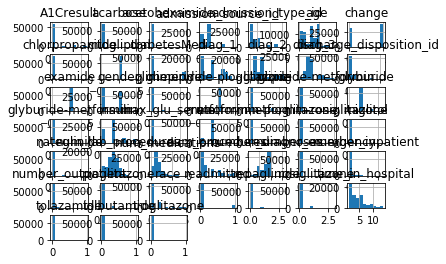

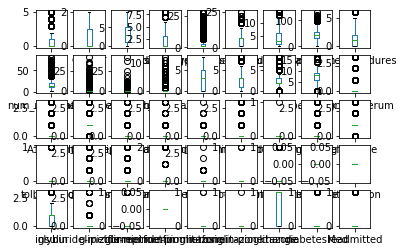

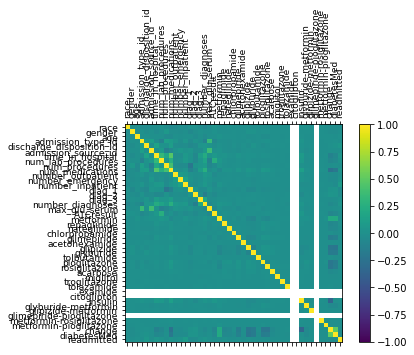

Accuracy score for KN: 0.903661
Precision score for KN: 0.529303
F1 score for KN: 0.491887
Accuracy score for CART: 0.817612
Precision score for CART: 0.515579
F1 score for CART: 0.516196


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score for LR: 0.911882
Precision score for LR: 0.662002
F1 score for LR: 0.480258


In [2]:
import pandas as pd

import numpy as np

from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

#from pandas.tools.plotting import scatter_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


idMap = pd.read_csv("D:/sem5/EDD/dataset_diabetes/IDs_mapping.csv")
data = pd.read_csv("D:/sem5/EDD/dataset_diabetes/diabetic_data1.csv")
#, header=0, index_col=None)



# initial evaluation

data.head(5)

data.shape  # (101766, 50)

data.describe()

data.mode(axis=0)

data.groupby(data.columns[2]).groups.keys()



# drop columns with high percentage of missing values ( >50%) or not useful for our analysis

data['weight'].value_counts(1)  # normalized output,  96% unknown value(?)

data['payer_code'].value_counts(1)  # normalized output, not useful for our analysis

data['medical_specialty'].value_counts(1)  # normalized output,  49% unknown value



data = data.drop(["weight", "payer_code", "medical_specialty"], axis=1)



# several encounter ID for one patient, only considering the first encounter of each patient

data['patient_nbr'].unique().shape  # (71518,)

data[data.columns[0]].unique().shape  # (101766,)



datam1 = data.sort_values('encounter_id').groupby('patient_nbr').first()

datam2 = datam1.reset_index()  # [71518 rows x 50 columns]

datam2.head(2)



datam3 = datam2.drop(["patient_nbr", "encounter_id"], axis=1)



# other columns with missing values: Race (2%), Diagnosis 3 (1%)

# substituing "?" with "Missing"

datam3.race.value_counts(1)

datam3.race = datam3.race.replace('?', 'Missing')

datam3.readmitted = datam3.readmitted.replace("<30", 1)

datam3.readmitted = datam3.readmitted.replace([">30", "NO"], 0)

datam3.readmitted.value_counts(1)

"""0    0.912008

    1    0.087992 """

# list of ICD9 codes for diagnosis in the paper from -->https://en.wikipedia.org/wiki/List_of_ICD-9_codes

condition = {"Neoplasms": np.arange(140, 240).tolist()

    , "Diabtes": [250]

    , "Circulatory": np.append(785, np.arange(390, 460)).tolist()

    , "Respiratory": np.append(786, np.arange(460, 520)).tolist()

    , "Digestive": np.append(787, np.arange(520, 580)).tolist()

    , "Genitourinary": np.append(788, np.arange(580, 630)).tolist()

    , "Musculoskeletal": np.arange(710, 740).tolist()

    , "Injury": np.arange(800, 1000).tolist()

 }

# reverse the condition dictionary

conditionrvs = {np.str(value): key for key, values in condition.items() for value in values}

datam3.diag_1 = datam3.diag_1.replace(conditionrvs.keys(), conditionrvs.values())

datam3.diag_1[~datam3.diag_1.isin(condition.keys())] = np.nan

datam3.diag_1 = datam3.diag_1.fillna("Other")

datam3.diag_1.value_counts(1)


datam3.diag_2 = datam3.diag_2.replace(conditionrvs.keys(), conditionrvs.values())

datam3.diag_2[~datam3.diag_2.isin(condition.keys())] = np.nan

datam3.diag_2 = datam3.diag_2.fillna("Other")

datam3.diag_2.value_counts(1)



datam3.diag_3 = datam3.diag_3.replace(conditionrvs.keys(), conditionrvs.values())

datam3.diag_3[~datam3.diag_3.isin(condition.keys())] = np.nan

datam3.diag_3 = datam3.diag_3.fillna("Other")

datam3.diag_3.value_counts(1)



# Age column modification: substituting by min of age in each interval

datam3.age = datam3.age.str.extract(r"\[(\d{2})*", expand=True)

datam3.head(2)

# age group: 30 years old or younger, 30-60 years olf , older than 60
# getting and changing data types of columns, sklearn only use numerical

datam3.dtypes

datam3_cat = datam3.select_dtypes(include=[np.object])

datam3.age = datam3.age.astype(np.float64)

datam3.dtypes == object

datam4 = datam3[:]


Mapping = {}

for col in datam3_cat:

    Mapping[col] = datam3.loc[:, col].unique()

    datam4.loc[:, col] = datam4.loc[:, col].replace(datam4.loc[:, col].unique(),

                                                    np.arange(datam4.loc[:, col].unique().__len__()))



datam4.dtypes


#more data preprocessing, standardizing the data

datam4_st = StandardScaler().fit_transform(datam4)

#covariance matrix and eigen decomposition

"""mean_col = np.mean(datam4_st, axis=0)

covmat = (datam4_st-mean_col).T.dot((datam4_st-mean_col))/(datam4_st.shape[0]-1)

print('covariance matrix :  %s ' %covmat)"""



print('covariance matrix: \n %s' %np.cov(datam4_st.T))

eig_vals, eig_vecs = np.linalg.eig(np.cov(datam4_st.T))



# Data processing: statistical paramters, distributions, boxplots, correlations,....

datam4.hist()

# boxplots

datam4.plot(kind='box', subplots=True, layout=(5, 9), sharex=False, sharey=False)

plt.show()



# correlation

correlations = datam4.corr()

# plot correlation matrix

fig = plt.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = np.arange(datam4.shape[1])

ax.set_xticks(ticks)

ax.set_yticks(ticks)

names = datam4.columns.tolist()

ax.set_xticklabels(names, fontsize=9, rotation=90)

ax.set_yticklabels(names, fontsize=9)

plt.show()

# scatterplot matrix

# scatter_matrix(datam4)

# plt.show()



# training algorithm section

# predictors : better to choose the most important column,first run with all columns

predictors = datam4.columns.tolist()[:-1]



# Generate cross validation folds

kf = KFold(n_splits=3, random_state=1)

algorithms = []

algorithms.append(('KN', KNeighborsClassifier()))

algorithms.append(('CART', DecisionTreeClassifier()))

algorithms.append(('LR', LogisticRegression()))



predictions_all = []

name_all = []

for nameAlg, alg in algorithms:

    alg = alg

    predictions = []

    for train, test in kf.split(datam4):

        train_predictors = datam4[predictors].iloc[train, :]

        train_target = datam4['readmitted'].iloc[train]



        alg.fit(train_predictors, train_target)



        test_predictions = alg.predict(datam4[predictors].iloc[test, :])

        predictions.append(test_predictions)



    # predictions are 3 separate numpy arrays so we concatenate them

    predictions = np.concatenate(predictions, axis=0)

    predictions_all.append(predictions)

    name_all.append(nameAlg)

    # precision, recall and F1-score

    print("Accuracy score for %s: %2f" % (nameAlg, metrics.accuracy_score(datam4['readmitted'], predictions)))

    print("Precision score for %s: %2f" % (

    nameAlg, metrics.precision_score(datam4['readmitted'], predictions, average="macro")))

    print("F1 score for %s: %2f" % (

        nameAlg, metrics.f1_score(datam4['readmitted'], predictions, average="macro")))